<a href="https://colab.research.google.com/github/aomnchp-s/6003-APPLIED-ML/blob/main/ML_practice1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aomnchp-s/6003-APPLIED-ML/main/Housing.csv')

In [22]:
#delte duplicate row
df2 = pd.DataFrame(df)
df_deldup = df2.drop_duplicates()
df_deldup

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [23]:
#creat new column mainroaadx for yes=1 and no=0
df_deldup.loc[df_deldup['mainroad'] == 'yes', 'mainroadx'] = '1'
df_deldup.loc[df_deldup['mainroad'] == 'no', 'mainroadx'] = '0'
df_final = pd.DataFrame(df_deldup)
df_final

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroadx
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0


In [37]:
X = df_final[['area','bedrooms','parking','mainroadx']]
Y = df_final[['price']]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

modelLin = LinearRegression()
modelLin.fit(X_train,Y_train)

LinearRegression()

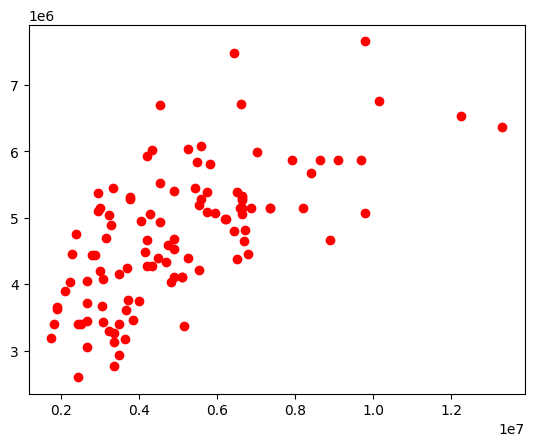

In [50]:
Y_Pred = modelLin.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_Pred,color='red')

In [41]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(Y_test, Y_Pred))

MSE: 3150637147299.2744
